# Experiment 3: Implementation of Image Enhancement Methods (Spatial & Frequency Domain)
### Rohan Sharma - A70405218066 - BCSEL1907

Original Image Shape: (517, 926)


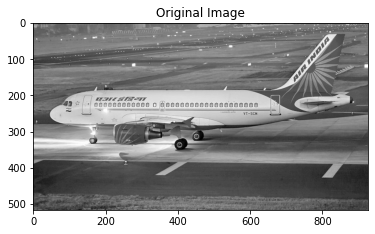

In [1]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('Images/airindia.bmp', cv2.IMREAD_GRAYSCALE)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
print('Original Image Shape:', image.shape)

## 1. Smoothing Filters<br>Average, Weighted, Median, Minimum, Maximum, Mid-Point
* Image smoothing filters are applied to reduce the amount of noise in an image.<br>
* This process involves convolution i.e. moving a kernel over the image pixels and computing new values.<br>
    * **Average Filter:** Computes the average of the pixel values in the kernel.
    * **Weighted Average Filter:** Computes the weighted average of the pixel values in the kernel.
    * **Median:** Computes the median of all the pixel values in the kernel.
    * **Minimum:** Selects the least pixel value of all those in the kernel.
    * **Maximum:** Selects the highest pixel value of all those in the kernel.
    * **Mid-Point:** Computes the average of the maximum and minimum pixel values in the kernel.

In [2]:
average_filter = np.zeros(image.shape)
weighted_filter = np.zeros(image.shape)
median_filter = np.zeros(image.shape)
min_filter = np.zeros(image.shape)
max_filter = np.zeros(image.shape)
midpoint_filter = np.zeros(image.shape)

padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT) # Padding Image
print('Padded Image Shape:', padded_image.shape)

Padded Image Shape: (519, 928)


In [3]:
# Moving 3x3 Kernel Over Padded Image
for x in range(1, padded_image.shape[0]-1):
    for y in range(1, padded_image.shape[1]-1):
        neighbours = list()
        neighbours.append(padded_image[x-1][y-1]) # w0
        neighbours.append(padded_image[x-1, y])   # w1
        neighbours.append(padded_image[x-1, y+1]) # w2
        neighbours.append(padded_image[x, y-1])   # w3
        neighbours.append(padded_image[x, y])     # w4
        neighbours.append(padded_image[x, y+1])   # w5
        neighbours.append(padded_image[x+1, y-1]) # w6
        neighbours.append(padded_image[x+1, y])   # w7
        neighbours.append(padded_image[x+1, y+1]) # w8
        average_filter[x-1][y-1] = sum(neighbours) / len(neighbours)
        weighted_filter[x-1][y-1] = ((neighbours[0]+neighbours[2]+neighbours[6]+neighbours[8]) \
                                    + (2*(neighbours[1]+neighbours[3]+neighbours[5]+neighbours[7])) \
                                    + (4*neighbours[4])) / 16
        median_filter[x-1][y-1] = sorted(neighbours)[len(neighbours)//2]
        min_filter[x-1][y-1] = min(neighbours)
        max_filter[x-1][y-1] = max(neighbours)
        midpoint_filter[x-1][y-1] = (max(neighbours)+min(neighbours))/2

C:\Users\ROHANS~1\AppData\Local\Temp/ipykernel_372/1235819144.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  + (2*(neighbours[1]+neighbours[3]+neighbours[5]+neighbours[7])) \
C:\Users\ROHANS~1\AppData\Local\Temp/ipykernel_372/1235819144.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  weighted_filter[x-1][y-1] = ((neighbours[0]+neighbours[2]+neighbours[6]+neighbours[8]) \
C:\Users\ROHANS~1\AppData\Local\Temp/ipykernel_372/1235819144.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
  midpoint_filter[x-1][y-1] = (max(neighbours)+min(neighbours))/2


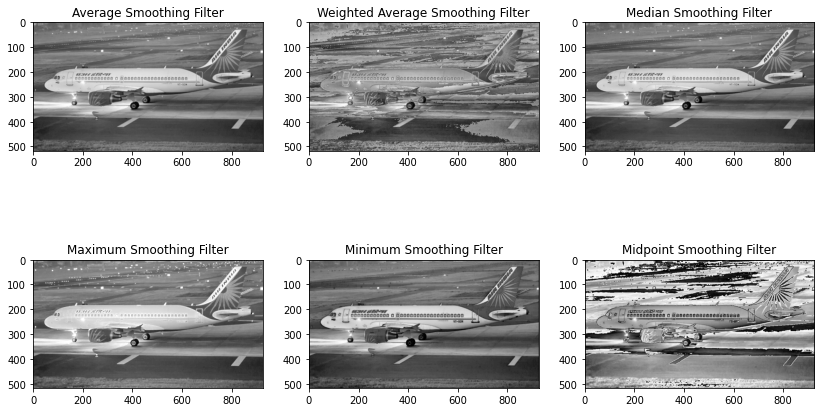

In [4]:
# Displaying Results
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)


ax1.imshow(average_filter, cmap='gray')
ax1.title.set_text('Average Smoothing Filter')
ax2.imshow(weighted_filter, cmap='gray')
ax2.title.set_text('Weighted Average Smoothing Filter')
ax3.imshow(median_filter, cmap='gray')
ax3.title.set_text('Median Smoothing Filter')
ax4.imshow(max_filter, cmap='gray')
ax4.title.set_text('Maximum Smoothing Filter')
ax5.imshow(min_filter, cmap='gray')
ax5.title.set_text('Minimum Smoothing Filter')
ax6.imshow(midpoint_filter, cmap='gray')
ax6.title.set_text('Midpoint Smoothing Filter')
plt.show()

## 2. Smoothing with Gaussian Filter
* The effect of applying the Gaussian filter is to blur an image and remove detail and noise.
* It uses a kernel that represents the shape of a Gaussian or bell-shaped hump.
* The Gaussian filter outputs a weighted average of each pixel’s neighborhood, with the average weighted more towards the value of the central pixels.

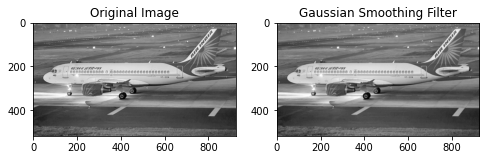

In [5]:
gaussian_filter = cv2.GaussianBlur(image, (3,3), 0)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(gaussian_filter, cmap='gray')
ax2.title.set_text('Gaussian Smoothing Filter')

## 3. Sharpening Filters<br>Laplace Filter, Unsharp Mask, High Boost Filter, Gradient Mask
* Image sharpening involves emphasizing details and enhances the edges of objects in an image.
* Sharpening filters are very sensitive to noise. Sharpening may create unwanted edge effects or increase image noise.
    * **Laplace Filter:** Involves the Laplacian kernel for edge detection.
    * **Unsharp Mask:** Involves subtracting the blurred image from the original image before filtering.
    * **High Boost Filter:** Is a specialized case of the unsharp masking filter.
    * **Gradient Mask:** Makes use of the Sobel operator to detect edges.

In [6]:
# Laplace Filter
laplacian = cv2.Laplacian(image, cv2.CV_8U)

# Unsharp Masking
gaussian_blur = cv2.GaussianBlur(image, (7,7), 0)
unsharp_image = cv2.addWeighted(image, 2, gaussian_blur, -1, 0)

'''
# 2D Filtering
conv_filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
filtered = cv2.filter2D(image, -1, conv_filter)
'''

# High Boost Filter
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
high_boost_image = cv2.filter2D(image, -1, kernel)

# Gradient Mask
gradient_mask_image = cv2.Sobel(image, cv2.CV_8UC1, 1, 0)

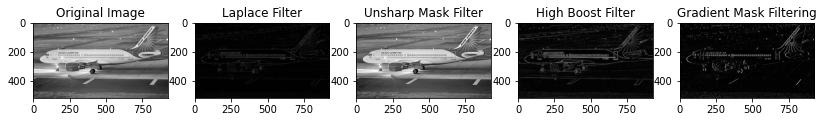

In [7]:
# Displaying Results
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(laplacian, cmap='gray')
ax2.title.set_text('Laplace Filter')
ax3.imshow(unsharp_image, cmap='gray')
ax3.title.set_text('Unsharp Mask Filter')
ax4.imshow(high_boost_image, cmap='gray')
ax4.title.set_text('High Boost Filter')
ax5.imshow(gradient_mask_image, cmap='gray')
ax5.title.set_text('Gradient Mask Filtering')

## 4. Noise Removal
* Denoising of an image refers to the process of reconstruction of a signal from noisy images.
* Denoising is done to remove unwanted noise from image to analyze it in better form.
* Denoising is achieved using the *cv2.fastNlMeansDenoisingColored* function.

In [8]:
# Adding Noise to Image
noise = np.zeros(image.shape, np.uint8)
cv2.randn(noise, mean=0, stddev=30)
noisy = cv2.add(image, noise)

# Noise Removal
colored = cv2.cvtColor(noisy, cv2.COLOR_GRAY2BGR)
denoised = cv2.fastNlMeansDenoisingColored(colored, None, 10, 10, 7, 15)

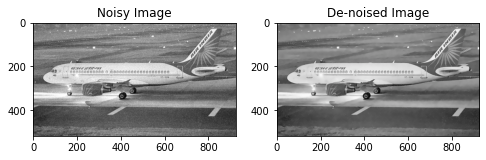

In [9]:
# Displaying Results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(noisy, cmap='gray')
ax1.title.set_text('Noisy Image')
ax2.imshow(denoised, cmap='gray')
ax2.title.set_text('De-noised Image')

## 5. Histogram Based Processing
* In digital image processing, the histogram is used for graphical representation of a digital image.
* A graph is a plot by the number of pixels for each tonal value.

### Histogram Equalization
* Histogram equalization is used for equalizing all the pixel values of an image.
* Transformation is done in such a way that uniform flattened histogram is produced.
* Histogram equalization increases the dynamic range of pixel values.
* It makes an equal count of pixels at each level which produces a flat histogram with high contrast image.

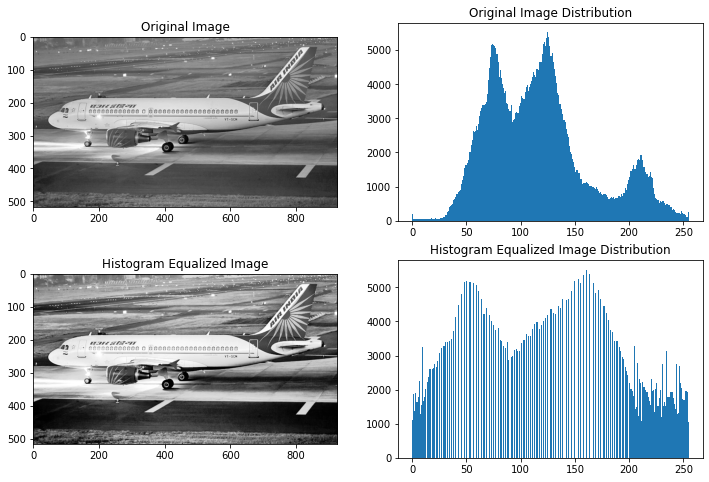

In [10]:
# Performing Histogram Equalization
equal_hist = cv2.equalizeHist(image)

# Displaying Results
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.hist(image.ravel(), bins=256)
ax2.title.set_text('Original Image Distribution')
ax3.imshow(equal_hist, cmap='gray')
ax3.title.set_text('Histogram Equalized Image')
ax4.hist(equal_hist.ravel(), bins=256)
ax4.title.set_text('Histogram Equalized Image Distribution')

### Histogram Matching (Specification)
* Histogram matching/specification is the transformation of an image so that its histogram matches a specified histogram.
* The histogram equalization method is a special case in which the specified histogram is uniformly distributed.
* The function *hist_match* below matches the histogram of the source image with that of the template image.

In [11]:
import numpy as np

def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image

    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

In [12]:
# Applying Histogram Matching Method
template_image = cv2.imread('Images/airindia.bmp', cv2.IMREAD_GRAYSCALE)
template_image =  cv2.add(template_image,np.array([50.0]))  # Making Template Image Lighter
source_image = cv2.imread('Images/airindia.jpg', cv2.IMREAD_GRAYSCALE)
source_image = cv2.resize(source_image, template_image.shape)  # Making Both Images of Same Shape
print('Source Image Shape:', source_image.shape)
print('Template Image Shape:', template_image.shape)

matched_image = hist_match(source_image, template_image)

Source Image Shape: (926, 517)
Template Image Shape: (517, 926)


Text(0.5, 1.0, 'Matched Image')

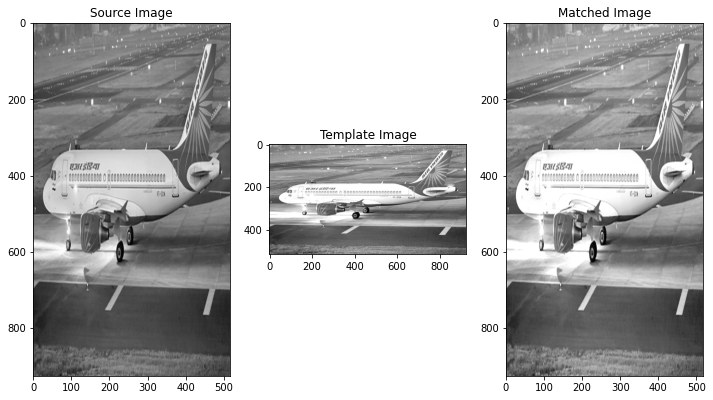

In [13]:
# Displaying Results
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(source_image, cmap=plt.cm.gray)
ax1.set_title('Source Image')
ax2.imshow(template_image, cmap=plt.cm.gray)
ax2.set_title('Template Image')
ax3.imshow(matched_image, cmap=plt.cm.gray)
ax3.set_title('Matched Image')